In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importa dati dell'Istituto Superiore di Sanità
Questi dati sono ricavati dai bollettini settimanali dell'ISS. Vedi ad esempio https://www.epicentro.iss.it/coronavirus/bollettino/Bollettino-sorveglianza-integrata-COVID-19_15-settembre-2021.pdf

In [31]:
df_assoluti = pd.read_csv('dati/dati_ISS_complessivi.csv', sep=';')

df_assoluti.index = pd.to_datetime(df_assoluti['data'], format='%Y/%m/%d')
df_assoluti.drop('data', axis=1, inplace=True)

df_assoluti

,non vaccinati,vaccinati completo,casi non vaccinati,casi vaccinati,ospedalizzati non vaccinati,ospedalizzati vaccinati,terapia intensiva non vaccinati,terapia intensiva vaccinati,decessi non vaccinati,decessi vaccinati
data,,,,,,,,,,
2021-09-15,13334156,35599815,96900,44990,6841,2331,786,163,770,405
2021-09-08,14507530,34292078,104890,43775,6579,2118,712,157,571,280
2021-09-01,15656647,32287644,107937,40380,5988,1788,641,127,383,187
2021-08-25,16708830,29628678,104405,33894,5162,1349,500,95,246,92
2021-08-18,17568325,26501452,95261,24978,4052,859,334,61,177,48
2021-08-11,20322716,22345659,80585,18887,3067,627,247,34,143,34
2021-08-04,21289761,19570464,60267,12333,2234,404,169,23,128,34
2021-07-28,22879167,17389604,40729,7277,1619,280,123,16,169,38
2021-07-21,24745853,15384196,26284,3805,1483,224,117,8,250,46


In [32]:
# trasforma in numeri settimanali
df_assoluti = (1/30)*df_assoluti

# Rappresentazione grafica dei risultati

In [33]:
x_date = ['2021-07-01', '2021-08-01', '2021-09-01']
x_label = ['\nLug \n21', '\nAgo \n21', '\nSet \n21']

def which_axe(x):
    axes[x].set_xlabel('')
    axes[x].set_xticks(x_date)
    axes[x].set_xticklabels(x_label)
    axes[x].legend(['Non vaccinati', 'Vaccinati'])
    axes[x].grid()

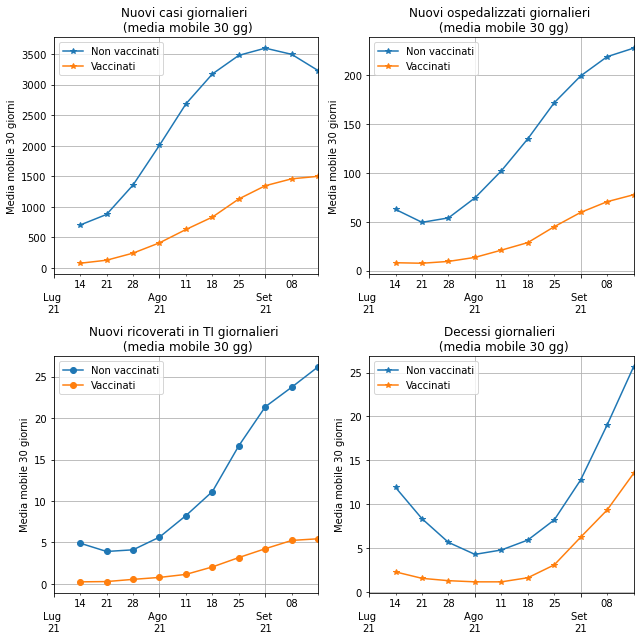

In [35]:
fig, axes2 = plt.subplots(nrows=2, ncols=2, figsize=(9, 9))

# unpack all the axes subplots
axes = axes2.ravel()

df_assoluti.iloc[:, [2, 3]].plot(ax=axes[0], marker='*')
axes[0].set_title('Nuovi casi giornalieri \n (media mobile 30 gg)')
which_axe(0)

df_assoluti.iloc[:, [4, 5]].plot(ax=axes[1], marker='*')
axes[1].set_title('Nuovi ospedalizzati giornalieri \n (media mobile 30 gg)')
which_axe(1)

df_assoluti.iloc[:, [6, 7]].plot(ax=axes[2], marker='o')
axes[2].set_title('Nuovi ricoverati in TI giornalieri \n (media mobile 30 gg)')
which_axe(2)

df_assoluti.iloc[:, [8, 9]].plot(ax=axes[3], marker='*')
axes[3].set_title('Decessi giornalieri \n (media mobile 30 gg)')
which_axe(3)

plt.tight_layout()
plt.savefig('risultati/andamento_epidemia_num_assoluti.png', dpi=300)
plt.show()